In [1]:
pip install chembl_webresource_client

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Target Protein Search

In [3]:
target = new_client.target
target_query = target.search('telomerase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Telomerase reverse transcriptase,22.0,False,CHEMBL3108654,"[{'accession': 'Q673L6', 'component_descriptio...",SINGLE PROTEIN,10116
1,"[{'xref_id': 'O14746', 'xref_name': None, 'xre...",Homo sapiens,Telomerase reverse transcriptase,21.0,False,CHEMBL2916,"[{'accession': 'O14746', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Prostaglandin E synthase 3,13.0,False,CHEMBL3341580,"[{'accession': 'Q15185', 'component_descriptio...",SINGLE PROTEIN,9606


# Target Selection hTERT 

In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL2916'

# Bioactivity Data Retrieval

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,106658,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,7.3
1,None,None,106659,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,None,107796,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,107797,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,9.5
4,None,None,107798,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776495,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
946,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776496,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
947,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776497,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
948,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776498,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,8.67


In [8]:
#Optional

df.to_csv('telomerase_01_bioactivity_data_raw.csv', index=False)

# Data Preprocessing- Missing Data Removal

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/tmp/ipykernel_2284260/3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,106658,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,7.3
1,None,None,106659,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,None,107796,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,107797,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,9.5
4,None,None,107798,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776495,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
946,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776496,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
947,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776497,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
948,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776498,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,8.67


# Duplicate Removal

In [10]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,106658,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,7.3
1,None,None,106659,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,None,107796,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,107797,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,9.5
4,None,None,107798,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24724383,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5114020,Inhibition of telomerase derived from human K5...,B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,0.55
945,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776495,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
946,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776496,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0
947,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776497,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0


In [11]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0
...,...,...,...
944,CHEMBL225340,c1ccc2c(NCCN3CCOCC3)c3[nH]c4ccccc4c3nc2c1,550.0
945,CHEMBL4551230,O=S(=O)(F)/C=C/C=C/c1ccc(/C=C/S(=O)(=O)F)cc1,1000.0
946,CHEMBL4456516,O=S(=O)(F)/C=C/c1ccc(-c2ccccc2)cc1,1000.0
947,CHEMBL4469807,O=S(=O)(F)/C=C/c1ccc2ccccc2c1,1000.0


In [12]:
#optional
df3.to_csv('telomerase_02_bioactivity_data_preprocessed.csv', index=False)

In [13]:
df4 = df3

# Compound Labeling Based on Their IC50 Values

In [14]:
bioactivity_threshold = []

for i in df4.standard_value:
    try:
        value = float(i)
        if value >= 10000:
            bioactivity_threshold.append("inactive")
        elif value <= 1000:
            bioactivity_threshold.append("active")
        else:
            bioactivity_threshold.append("intermediate")
    except (ValueError, TypeError):
        # Handle invalid or missing data
        bioactivity_threshold.append("missing")

In [15]:
# Create a Series with the bioactivity_threshold values
bioactivity_class = pd.Series(bioactivity_threshold, name='class')

# Ensure that the indices align correctly
df5 = pd.concat([df4.reset_index(drop=True), bioactivity_class], axis=1)
df5.tail()

,molecule_chembl_id,canonical_smiles,standard_value,class
687,CHEMBL225340,c1ccc2c(NCCN3CCOCC3)c3[nH]c4ccccc4c3nc2c1,550.0,active
688,CHEMBL4551230,O=S(=O)(F)/C=C/C=C/c1ccc(/C=C/S(=O)(=O)F)cc1,1000.0,active
689,CHEMBL4456516,O=S(=O)(F)/C=C/c1ccc(-c2ccccc2)cc1,1000.0,active
690,CHEMBL4469807,O=S(=O)(F)/C=C/c1ccc2ccccc2c1,1000.0,active
691,CHEMBL4452280,O=C1C[C@H](O)[C@@H]2c3c(ccc(O)c31)-c1ccc(O)c3c...,30000.0,inactive


In [16]:
#optional
df5.to_csv('telomerase_03_bioactivity_data_curated.csv', index=False)

In [17]:
##!zip telomerase.zip *.csv

In [18]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0,intermediate
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0,inactive
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0,inactive
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0,intermediate
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0,inactive
...,...,...,...,...
687,CHEMBL225340,c1ccc2c(NCCN3CCOCC3)c3[nH]c4ccccc4c3nc2c1,550.0,active
688,CHEMBL4551230,O=S(=O)(F)/C=C/C=C/c1ccc(/C=C/S(=O)(=O)F)cc1,1000.0,active
689,CHEMBL4456516,O=S(=O)(F)/C=C/c1ccc(-c2ccccc2)cc1,1000.0,active
690,CHEMBL4469807,O=S(=O)(F)/C=C/c1ccc2ccccc2c1,1000.0,active


# Selecting Longest Canonical SMILES

In [19]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [20]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [21]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,canonical_smiles
0,None,None,106658,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,7.3,O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCCCCCC...
1,None,None,106659,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...
2,None,None,107796,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...
3,None,None,107797,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,9.5,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...
4,None,None,107798,[],CHEMBL813598,Inhibitory activity against telomerase extract...,B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,100.0,N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H](Cc1c[nH]c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776495,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0,O=S(=O)(F)/C=C/C=C/c1ccc(/C=C/S(=O)(=O)F)cc1
946,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776496,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0,O=S(=O)(F)/C=C/c1ccc(-c2ccccc2)cc1
947,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776497,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,1.0,O=S(=O)(F)/C=C/c1ccc2ccccc2c1
948,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776498,[],CHEMBL5128270,Inhibition of telomerase (unknown origin),B,None,None,BAO_0000190,...,Telomerase reverse transcriptase,9606,None,None,IC50,uM,UO_0000065,None,8.67,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...


# Lipinski Ro5 Caluclation 

In [22]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [23]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [24]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,682.198,8.3756,4.0,5.0
1,922.417,6.3511,8.0,9.0
2,594.045,6.1297,4.0,6.0
3,775.324,8.4613,4.0,7.0
4,822.300,4.7851,8.0,8.0
...,...,...,...,...
945,320.338,2.7828,0.0,4.0
946,262.305,3.6236,0.0,2.0
947,236.267,3.1098,0.0,2.0
948,466.541,4.3540,2.0,6.0


In [25]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0,intermediate
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0,inactive
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0,inactive
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0,intermediate
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0,inactive
...,...,...,...,...
687,CHEMBL225340,c1ccc2c(NCCN3CCOCC3)c3[nH]c4ccccc4c3nc2c1,550.0,active
688,CHEMBL4551230,O=S(=O)(F)/C=C/C=C/c1ccc(/C=C/S(=O)(=O)F)cc1,1000.0,active
689,CHEMBL4456516,O=S(=O)(F)/C=C/c1ccc(-c2ccccc2)cc1,1000.0,active
690,CHEMBL4469807,O=S(=O)(F)/C=C/c1ccc2ccccc2c1,1000.0,active


In [26]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [27]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0,intermediate,682.198,8.3756,4.0,5.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0,inactive,922.417,6.3511,8.0,9.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0,inactive,594.045,6.1297,4.0,6.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0,intermediate,775.324,8.4613,4.0,7.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0,inactive,822.300,4.7851,8.0,8.0


# Calculating and Adding pIC50 Values from Normalized Micro Molar Concentrations

In [28]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-6) # Converts microM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

# Normalization of Concentration Values and Creation of Normalized Column

In [29]:
def norm_value(input):
    norm = []

    # Convert 'standard_value' column to numeric
    input['standard_value'] = pd.to_numeric(input['standard_value'], errors='coerce')

    for value in input['standard_value']:
        if value > 100000000:
            value = 100000000
        norm.append(value)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

# Apply the function to your DataFrame
df_norm = norm_value(df_combined)
df_norm.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,intermediate,682.198,8.3756,4.0,5.0,7300.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,922.417,6.3511,8.0,9.0,100000.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,594.045,6.1297,4.0,6.0,100000.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,intermediate,775.324,8.4613,4.0,7.0,9500.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,inactive,822.300,4.7851,8.0,8.0,100000.0


In [30]:
df_norm.standard_value_norm.describe()

count    6.920000e+02
mean     4.278179e+05
std      5.681780e+06
min      6.400000e-01
25%      1.657500e+03
50%      5.695000e+03
75%      2.290000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [31]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,intermediate,682.198,8.3756,4.0,5.0,2.136677
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,922.417,6.3511,8.0,9.0,1.000000
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,594.045,6.1297,4.0,6.0,1.000000
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,intermediate,775.324,8.4613,4.0,7.0,2.022276
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,inactive,822.300,4.7851,8.0,8.0,1.000000
...,...,...,...,...,...,...,...,...
945,NaN,NaN,NaN,320.338,2.7828,0.0,4.0,NaN
946,NaN,NaN,NaN,262.305,3.6236,0.0,2.0,NaN
947,NaN,NaN,NaN,236.267,3.1098,0.0,2.0,NaN
948,NaN,NaN,NaN,466.541,4.3540,2.0,6.0,NaN


In [32]:
df_final.pIC50.describe()

count    692.000000
mean       2.289280
std        0.954307
min       -2.000000
25%        1.640165
50%        2.244506
75%        2.780548
max        6.193820
Name: pIC50, dtype: float64

In [33]:
#optional
df_final.to_csv('telomerase_04_bioactivity_data_3class_pIC50.csv')

In [34]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

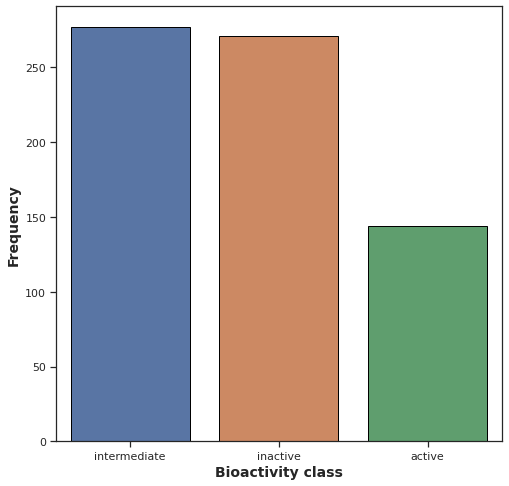

In [35]:
plt.figure(figsize=(8, 8))

sns.countplot(x='class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

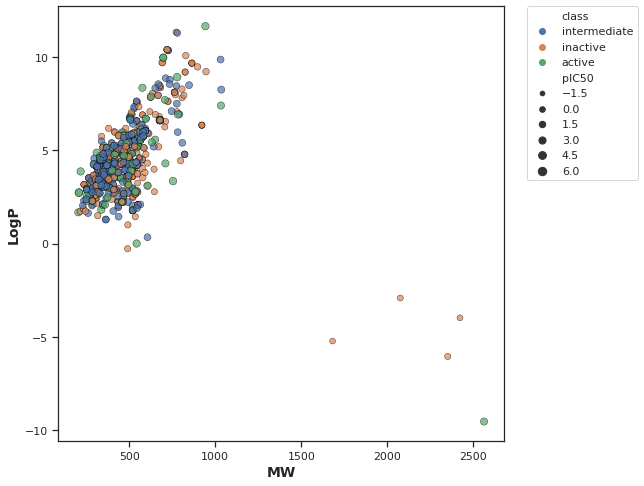

In [36]:
plt.figure(figsize=(8, 8))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Mann-Whitney U Test and Result Saving for Descriptor Comparison

In [37]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives intermediates and inactives 
  selection = [descriptor, 'class']
  df = df_final[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_final[selection]
  intermediate = df[df['class'] == 'intermediate']
  intermediate = intermediate[descriptor]

  selection = [descriptor, 'class']
  df = df_final[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [38]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,39024.0,3.312681e-63,0.05,Different distribution (reject H0)


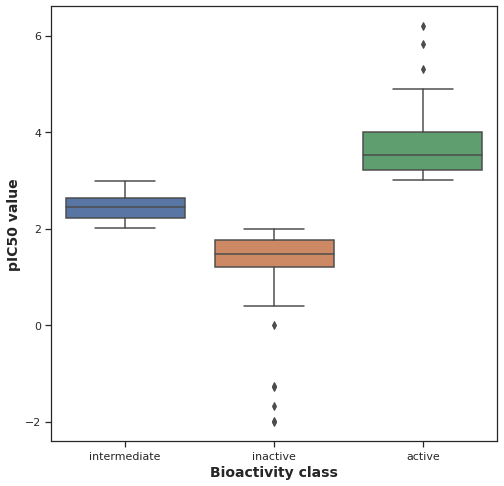

In [39]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [40]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,15740.0,0.001184,0.05,Different distribution (reject H0)


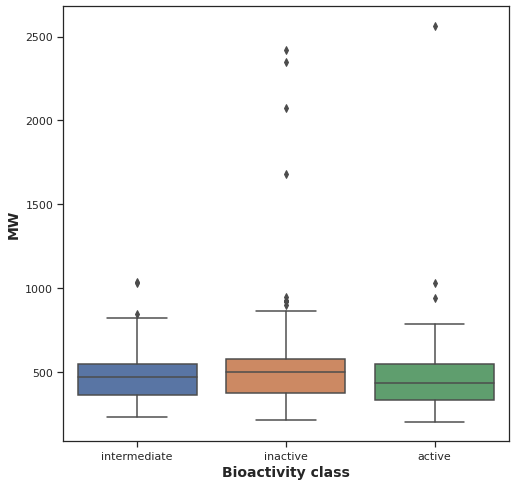

In [41]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [42]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,19035.5,0.682355,0.05,Same distribution (fail to reject H0)


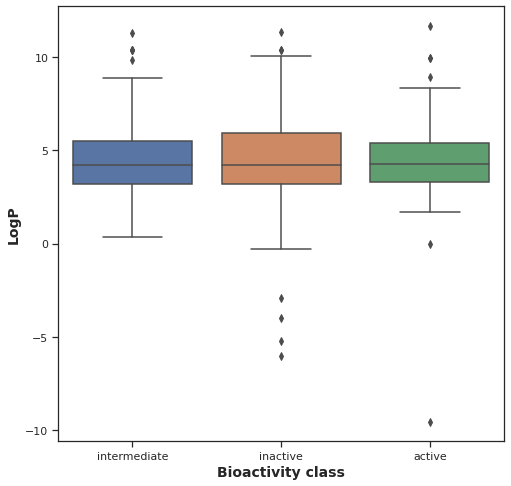

In [43]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [44]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,17365.5,0.054725,0.05,Same distribution (fail to reject H0)


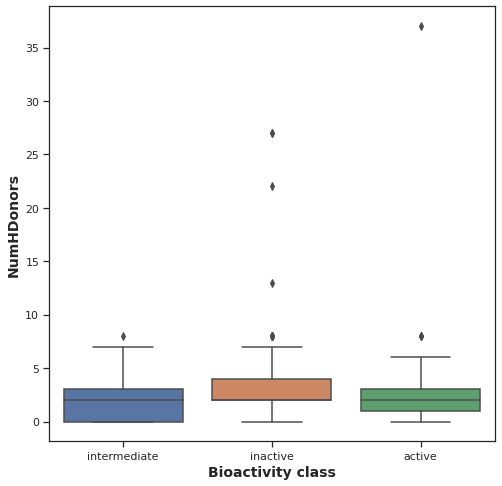

In [45]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [46]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,16833.0,0.019625,0.05,Different distribution (reject H0)


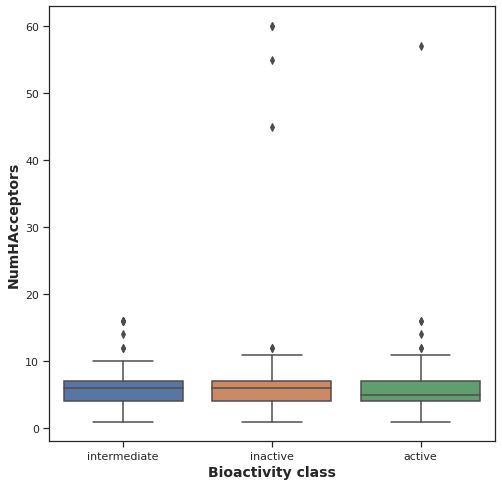

In [47]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [48]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_LogP.pdf (deflated 39%)
  adding: telomerase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: telomerase_02_bioactivity_data_preprocessed.csv (deflated 81%)
  adding: plot_MW.pdf (deflated 40%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: telomerase_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: descriptor_list.csv (deflated 96%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: telomerase_01_bioactivity_data_raw.csv (deflated 90%)
  adding: plot_MW_vs_LogP.pdf (deflated 5%)
  adding: descriptors_output.csv (deflated 95%)
  adding: plot_bioactivity_class.pdf (deflated 37%)


# Descriptor Calculation Using Padel

In [49]:
##!unzip padel.zip

In [50]:
df_final.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,intermediate,682.198,8.3756,4.0,5.0,2.136677
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,922.417,6.3511,8.0,9.0,1.000000
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,594.045,6.1297,4.0,6.0,1.000000
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,intermediate,775.324,8.4613,4.0,7.0,2.022276
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,inactive,822.300,4.7851,8.0,8.0,1.000000


In [51]:
df_final.dropna(inplace=True)  # Remove rows with missing values

In [52]:
selection = ['canonical_smiles','molecule_chembl_id']
df_final_selection = df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [53]:
! cat molecule.smi | wc -l

692


In [54]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [55]:
! bash padel.sh

Processing CHEMBL313020 in molecule.smi (13/692). 
Processing CHEMBL314057 in molecule.smi (1/692). 
Processing CHEMBL87116 in molecule.smi (14/692). 
Processing CHEMBL266842 in molecule.smi (2/692). 
Processing CHEMBL313345 in molecule.smi (7/692). 
Processing CHEMBL407131 in molecule.smi (9/692). 
Processing CHEMBL314847 in molecule.smi (3/692). 
Processing CHEMBL86984 in molecule.smi (4/692). 
Processing CHEMBL87554 in molecule.smi (5/692). 
Processing CHEMBL405650 in molecule.smi (12/692). 
Processing CHEMBL316111 in molecule.smi (15/692). 
Processing CHEMBL314864 in molecule.smi (16/692). 
Processing CHEMBL421541 in molecule.smi (6/692). 
Processing CHEMBL315431 in molecule.smi (10/692). 
Processing CHEMBL262163 in molecule.smi (8/692). 
Processing CHEMBL315220 in molecule.smi (11/692). 
Processing CHEMBL86349 in molecule.smi (17/692). 
Processing CHEMBL313922 in molecule.smi (18/692). 
Processing CHEMBL314040 in molecule.smi (19/692). 
Processing CHEMBL313818 in molecule.smi (20/

Processing CHEMBL310838 in molecule.smi (116/692). Average speed: 0.18 s/mol.
Processing CHEMBL81268 in molecule.smi (117/692). Average speed: 0.18 s/mol.
Processing CHEMBL3707074 in molecule.smi (118/692). Average speed: 0.17 s/mol.
Processing CHEMBL3707073 in molecule.smi (119/692). Average speed: 0.17 s/mol.
Processing CHEMBL82008 in molecule.smi (120/692). Average speed: 0.17 s/mol.
Processing CHEMBL2260103 in molecule.smi (121/692). Average speed: 0.17 s/mol.
Processing CHEMBL421360 in molecule.smi (122/692). Average speed: 0.17 s/mol.
Processing CHEMBL88876 in molecule.smi (123/692). Average speed: 0.17 s/mol.
Processing CHEMBL328062 in molecule.smi (124/692). Average speed: 0.17 s/mol.
Processing CHEMBL90883 in molecule.smi (125/692). Average speed: 0.17 s/mol.
Processing CHEMBL314305 in molecule.smi (126/692). Average speed: 0.17 s/mol.
Processing CHEMBL328440 in molecule.smi (127/692). Average speed: 0.17 s/mol.
Processing CHEMBL314100 in molecule.smi (128/692). Average speed:

Processing CHEMBL436311 in molecule.smi (223/692). Average speed: 0.17 s/mol.
Processing CHEMBL376279 in molecule.smi (224/692). Average speed: 0.17 s/mol.
Processing CHEMBL222238 in molecule.smi (225/692). Average speed: 0.17 s/mol.
Processing CHEMBL225572 in molecule.smi (226/692). Average speed: 0.17 s/mol.
Processing CHEMBL222757 in molecule.smi (227/692). Average speed: 0.17 s/mol.
Processing CHEMBL222381 in molecule.smi (228/692). Average speed: 0.17 s/mol.
Processing CHEMBL390725 in molecule.smi (229/692). Average speed: 0.17 s/mol.
Processing CHEMBL222547 in molecule.smi (230/692). Average speed: 0.17 s/mol.
Processing CHEMBL222539 in molecule.smi (231/692). Average speed: 0.17 s/mol.
Processing CHEMBL448169 in molecule.smi (232/692). Average speed: 0.17 s/mol.
Processing CHEMBL222490 in molecule.smi (233/692). Average speed: 0.17 s/mol.
Processing CHEMBL225211 in molecule.smi (234/692). Average speed: 0.17 s/mol.
Processing CHEMBL426182 in molecule.smi (235/692). Average speed

Processing CHEMBL1078511 in molecule.smi (329/692). Average speed: 0.16 s/mol.
Processing CHEMBL141661 in molecule.smi (330/692). Average speed: 0.16 s/mol.
Processing CHEMBL138811 in molecule.smi (331/692). Average speed: 0.17 s/mol.
Processing CHEMBL343795 in molecule.smi (332/692). Average speed: 0.17 s/mol.
Processing CHEMBL137809 in molecule.smi (333/692). Average speed: 0.17 s/mol.
Processing CHEMBL138761 in molecule.smi (334/692). Average speed: 0.17 s/mol.
Processing CHEMBL337762 in molecule.smi (335/692). Average speed: 0.17 s/mol.
Processing CHEMBL138357 in molecule.smi (336/692). Average speed: 0.17 s/mol.
Processing CHEMBL140084 in molecule.smi (337/692). Average speed: 0.17 s/mol.
Processing CHEMBL342480 in molecule.smi (338/692). Average speed: 0.17 s/mol.
Processing CHEMBL343609 in molecule.smi (339/692). Average speed: 0.17 s/mol.
Processing CHEMBL140354 in molecule.smi (340/692). Average speed: 0.17 s/mol.
Processing CHEMBL138187 in molecule.smi (341/692). Average spee

Processing CHEMBL2260106 in molecule.smi (435/692). Average speed: 0.16 s/mol.
Processing CHEMBL2260105 in molecule.smi (436/692). Average speed: 0.16 s/mol.
Processing CHEMBL2260104 in molecule.smi (438/692). Average speed: 0.15 s/mol.
Processing CHEMBL2111043 in molecule.smi (437/692). Average speed: 0.15 s/mol.
Processing CHEMBL2298049 in molecule.smi (439/692). Average speed: 0.15 s/mol.
Processing CHEMBL2297965 in molecule.smi (440/692). Average speed: 0.15 s/mol.
Processing CHEMBL2297964 in molecule.smi (441/692). Average speed: 0.15 s/mol.
Processing CHEMBL2297963 in molecule.smi (442/692). Average speed: 0.15 s/mol.
Processing CHEMBL2297962 in molecule.smi (443/692). Average speed: 0.15 s/mol.
Processing CHEMBL2297961 in molecule.smi (444/692). Average speed: 0.16 s/mol.
Processing CHEMBL2297960 in molecule.smi (445/692). Average speed: 0.16 s/mol.
Processing CHEMBL2297959 in molecule.smi (446/692). Average speed: 0.16 s/mol.
Processing CHEMBL2297958 in molecule.smi (447/692). 

Processing CHEMBL3115516 in molecule.smi (539/692). Average speed: 0.15 s/mol.
Processing CHEMBL3115514 in molecule.smi (540/692). Average speed: 0.15 s/mol.
Processing CHEMBL3115509 in molecule.smi (542/692). Average speed: 0.15 s/mol.
Processing CHEMBL3115513 in molecule.smi (541/692). Average speed: 0.15 s/mol.
Processing CHEMBL3347655 in molecule.smi (543/692). Average speed: 0.15 s/mol.
Processing CHEMBL165 in molecule.smi (544/692). Average speed: 0.15 s/mol.
Processing CHEMBL340160 in molecule.smi (545/692). Average speed: 0.15 s/mol.
Processing CHEMBL86416 in molecule.smi (546/692). Average speed: 0.15 s/mol.
Processing CHEMBL1081908 in molecule.smi (547/692). Average speed: 0.15 s/mol.
Processing CHEMBL3347541 in molecule.smi (548/692). Average speed: 0.15 s/mol.
Processing CHEMBL3347540 in molecule.smi (549/692). Average speed: 0.15 s/mol.
Processing CHEMBL398742 in molecule.smi (550/692). Average speed: 0.15 s/mol.
Processing CHEMBL3347539 in molecule.smi (551/692). Average 

Processing CHEMBL3786236 in molecule.smi (619/692). Average speed: 0.15 s/mol.
Processing CHEMBL3786636 in molecule.smi (620/692). Average speed: 0.15 s/mol.
Processing CHEMBL3786821 in molecule.smi (621/692). Average speed: 0.15 s/mol.
Processing CHEMBL3787509 in molecule.smi (622/692). Average speed: 0.15 s/mol.
Processing CHEMBL3786403 in molecule.smi (623/692). Average speed: 0.15 s/mol.
Processing CHEMBL3786130 in molecule.smi (624/692). Average speed: 0.15 s/mol.
Processing CHEMBL3786734 in molecule.smi (625/692). Average speed: 0.15 s/mol.
Processing CHEMBL3785112 in molecule.smi (626/692). Average speed: 0.15 s/mol.
Processing CHEMBL3785970 in molecule.smi (627/692). Average speed: 0.15 s/mol.
Processing CHEMBL3787256 in molecule.smi (628/692). Average speed: 0.15 s/mol.
Processing CHEMBL3785712 in molecule.smi (629/692). Average speed: 0.15 s/mol.
Processing CHEMBL3786261 in molecule.smi (630/692). Average speed: 0.15 s/mol.
Processing CHEMBL3785758 in molecule.smi (631/692). 

In [56]:
df_X = pd.read_csv('descriptors_output.csv')
df_X.shape

(692, 882)

# Input Feature For Machine Learning Model Training 

In [57]:
df_X = df_X.drop(columns=['Name'])
df_X.shape

(692, 881)

In [58]:
df_Y = df_final[['pIC50']].reset_index(drop=True)
df_Y

,pIC50
0,2.136677
1,1.000000
2,1.000000
3,2.022276
4,1.000000
...,...
687,3.259637
688,3.000000
689,3.000000
690,3.000000


In [59]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset.shape

(692, 882)

In [60]:
dataset.to_csv('telomerase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Splitting The Data

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [62]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.136677
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.022276
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.259637
688,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
689,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
690,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000


In [63]:
X = dataset.drop('pIC50', axis=1)
X.dropna(inplace=True)  # Remove rows with missing values
X.tail()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
687,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
688,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
y = dataset.pIC50
y = y.drop(y.index[-1])
y.tail()

686    2.809668
687    3.259637
688    3.000000
689    3.000000
690    3.000000
Name: pIC50, dtype: float64

In [65]:
X.to_csv('descriptor_list.csv', index = False)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Initialize the Random Forest Regressor (you can adjust hyperparameters)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [68]:
y_pred = rf_regressor.predict(X_test) ##Make prediction

In [69]:
##Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.6095041794335444
Mean Squared Error (MSE): 0.6686300154470753
R-squared (R2): 0.2717208199379807


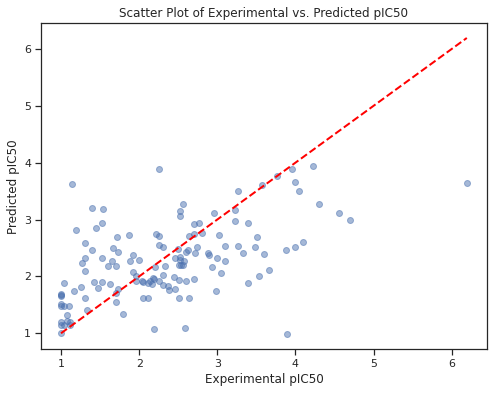

In [70]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha controls point transparency

# Set axis labels
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')

# Add a title
plt.title('Scatter Plot of Experimental vs. Predicted pIC50')

# Optionally, add a diagonal line for reference (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()


In [75]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable experimental HGBR
from sklearn.ensemble import HistGradientBoostingRegressor

/home/nick/.local/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [76]:
# # Initialize the HistGradientBoostingRegressor (you can adjust hyperparameters)
hgb_regressor = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# # Train the model on the training data
hgb_regressor.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [77]:
y_pred = hgb_regressor.predict(X_test)


In [78]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.5960289853466711
Mean Squared Error (MSE): 0.6285160938879446
R-squared (R2): 0.3154133452916653


In [80]:
pickle.dump(hgb_regressor, open('telomerase_model_latest.pkl', 'wb'))

In [81]:
pwd

'/home/nick/Desktop/dec_gem'

In [73]:
# import pickle

In [74]:
# pickle.dump(model, open('telomerase_model_lat.pkl', 'wb'))

NameError: name 'model' is not defined

In [ ]:
pwd